## Fake Currency Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\hp\Desktop\Python Programs\New folder\Python Object and Data Structure Basics\csv file\All Files\All Files\FakeCurrencyModel.csv")
data.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
data.shape

(1372, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   Target    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
data.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'Target'], dtype='object')

In [6]:
data.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
Target        int64
dtype: object

In [7]:
data.describe()

,variance,skewness,curtosis,entropy,Target
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [8]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
Target      0
dtype: int64

In [10]:
data['Target'].unique()

array([0, 1], dtype=int64)

In [12]:
data['Target'].value_counts()

0    762
1    610
Name: Target, dtype: int64

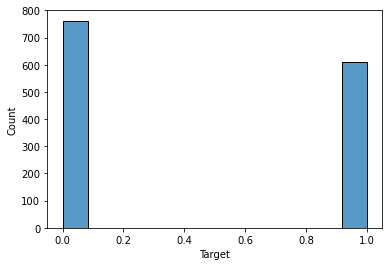

In [16]:
sns.histplot(data['Target'], label= "count")

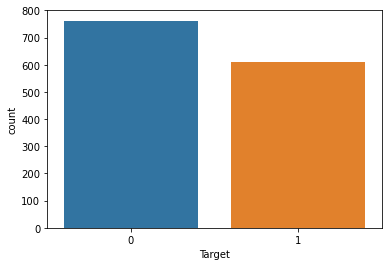

In [17]:
sns.countplot(data['Target'], label= 'count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002886DEB6DC8>,
      dtype=object)

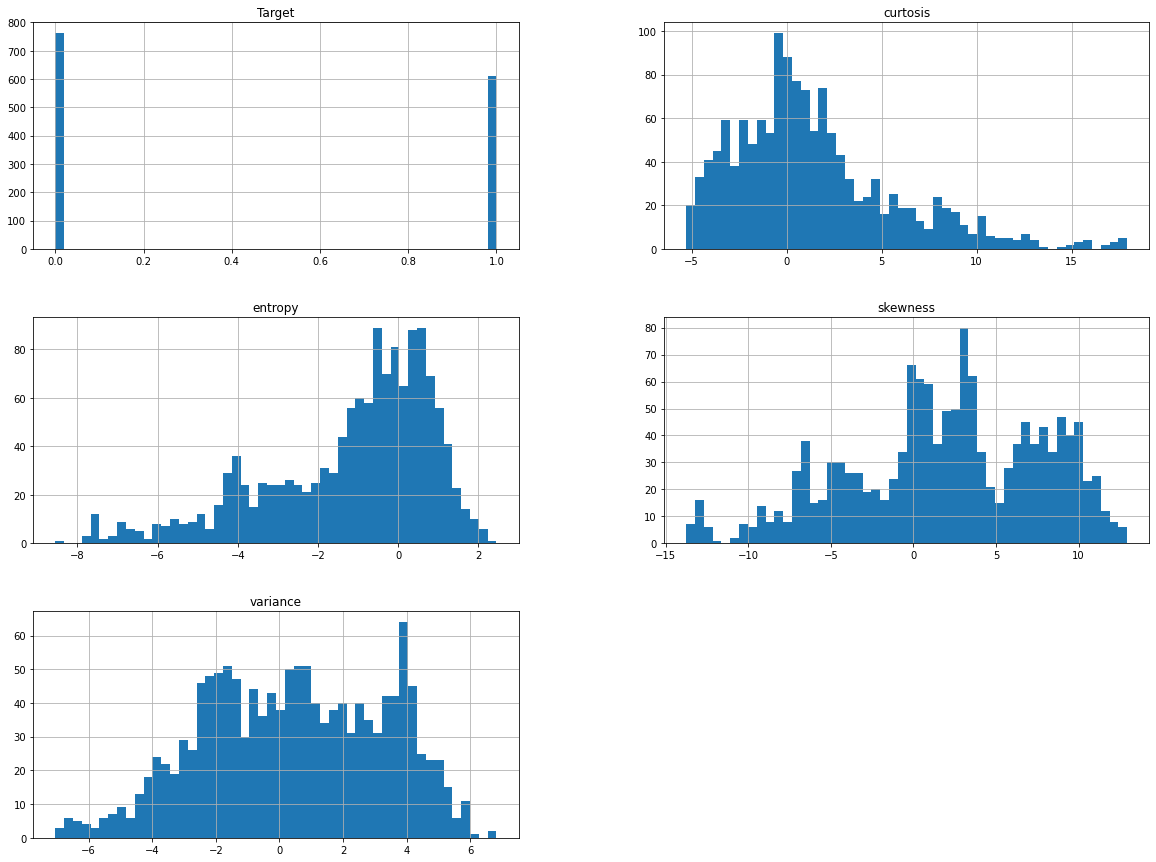

In [18]:
data.hist(bins= 50, figsize= (20,15))

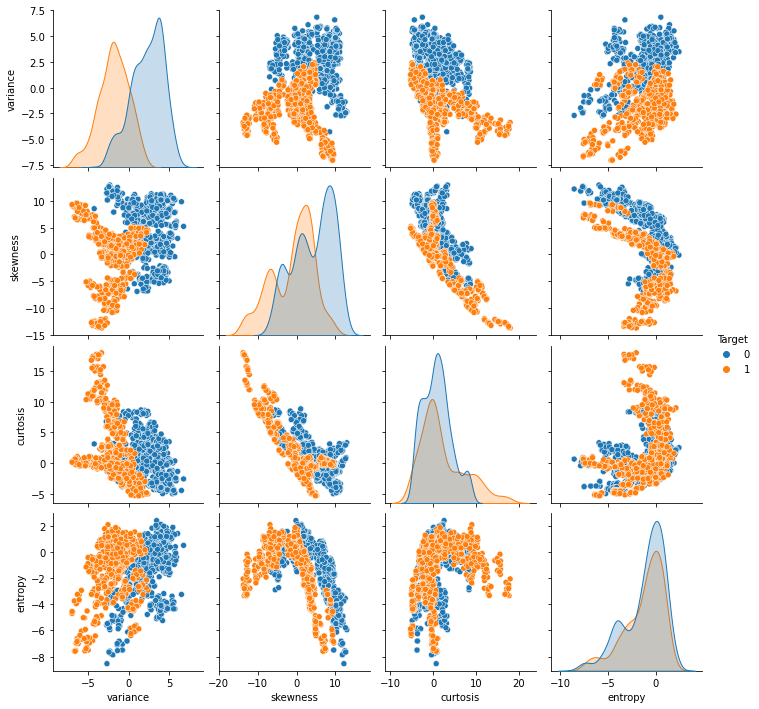

In [19]:
sns.pairplot(data, hue= 'Target')

In [20]:
y = data['Target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [21]:
x = data.drop('Target', axis=1)
x.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [22]:
var = pd.DataFrame(x)
var

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [23]:
var.head(5)

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [24]:
var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
dtypes: float64(4)
memory usage: 43.0 KB


# Training and Testing dataset

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.30, stratify = y)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [30]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(random_state= 0, multi_class = 'auto')

In [31]:
regressor.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
regressor.fit(x_train, y_train)
regressor_pred = regressor.predict(x_test)
print(confusion_matrix(y_test, regressor_pred))
print('\n')
print(classification_report(y_test, regressor_pred))
print('\n')
print('Accuracy Score :', accuracy_score(y_test, regressor_pred) )

[[221   8]
 [  0 183]]


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       229
           1       0.96      1.00      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



Accuracy Score : 0.9805825242718447


In [36]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=12)
forest.fit(x_train,y_train)
forest_pred = forest.predict(x_test)
print (confusion_matrix(y_test,forest_pred))
print('\n')
print (classification_report(y_test,forest_pred))
print('\n')
print (accuracy_score(y_test,forest_pred))

[[228   1]
 [  0 183]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.99      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



0.9975728155339806


In [37]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)
print (confusion_matrix(y_test,tree_pred))
print('\n')
print (classification_report(y_test,tree_pred))
print('\n')
print (accuracy_score(y_test,tree_pred))

[[224   5]
 [  1 182]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       229
           1       0.97      0.99      0.98       183

    accuracy                           0.99       412
   macro avg       0.98      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



0.9854368932038835


In [45]:
import pickle
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
pickle.dump(forest,open(r'C:\Users\hp\Desktop\Python Programs\New folder\Python Object and Data Structure Basics\csv file\All Files\All Files\model.pkl', 'wb'))